In [129]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import math
import random

import matplotlib.pyplot as plt

import random
from pprint import pprint

In [130]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [131]:
from sklearn.datasets.samples_generator import make_blobs
X, Y = make_blobs(n_samples = 200,centers = 2, n_features = 2, cluster_std = 5, random_state=11)
m=200

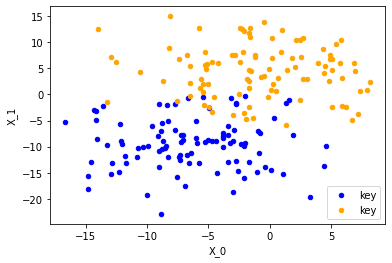

In [132]:
df = DataFrame(dict(x=X[:,0], y=X[:,1],label=Y))
colors = {0: "blue", 1: "orange"}
fig, ax = plt.subplots()
grouped = df.groupby("label")
for key, group in grouped:
  group.plot(ax=ax, kind="scatter", x="x", y="y", label="key", color=colors[key])
plt.xlabel("X_0")
plt.ylabel("X_1")
plt.show()

In [133]:
df

,x,y,label
0,1.016203,12.355419,1
1,-2.431642,6.260284,1
2,-7.580858,-15.772226,0
3,-7.285072,-12.480268,0
4,4.614675,-9.795830,0
...,...,...,...
195,-12.255206,-14.840333,0
196,-10.711369,-10.263203,0
197,3.269921,-19.578353,0
198,-6.737013,7.496982,1


In [134]:
def logisticRegression(epochs, learningRate, dataset):
  a = 1
  b = 1
  c = 1
  for x in range(epochs):
      x = random.randint(0, len(dataset))
      # if dataset._get_value(x, "label") == 0:
      #   a = a + ((learningRate * -1 - (activationFunction(distanceFromLine(x,a,b,c,dataset))) * dataset._get_value(x,"x")))
      #   b = b + ((learningRate * -1 - (activationFunction(distanceFromLine(x,a,b,c,dataset))) * dataset._get_value(x,"y")))
      #   c = c + ((learningRate * -1 - activationFunction(distanceFromLine(x,a,b,c,dataset))))
      # else:
      #   a = a + ((learningRate * (dataset._get_value(x,"label")) - (activationFunction(distanceFromLine(x,a,b,c,dataset))) * dataset._get_value(x,"x")))
      #   b = b + ((learningRate * (dataset._get_value(x,"label")) - (activationFunction(distanceFromLine(x,a,b,c,dataset))) * dataset._get_value(x,"y")))
      #   c = c + ((learningRate * (dataset._get_value(x,"label")) - activationFunction(distanceFromLine(x,a,b,c,dataset))))
      if dataset._get_value(x, "label") == 0 and distanceFromLine(x,a,b,c,dataset) > 0:
        a = a - (learningRate * dataset._get_value(x,"x"))
        b = b - (learningRate * dataset._get_value(x,"y"))
        c = c - learningRate
      elif dataset._get_value(x, "label") == 1 and distanceFromLine(x,a,b,c,dataset) < 0:
        a = a + (learningRate * dataset._get_value(x,"x"))
        b = b + (learningRate * dataset._get_value(x,"y"))
        c = c + learningRate
  return a, b, c

In [135]:
def activationFunction(p):
  return 1/(1+(math.pow(np.exp(1),p)))

In [136]:
def distanceFromLine(x,a,b,c,df):
  return (a*df._get_value(x,"x")) + (b*df._get_value(x,"y")) + c

In [137]:
a,b,c = logisticRegression(100, 0.01, df)
print(a)
print(b)
print(c)

0.739346625930252
0.8395739272275148
1.09


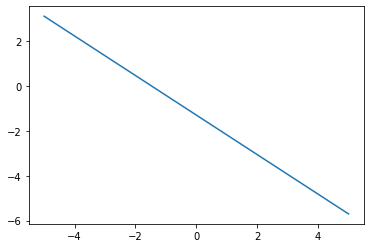

In [138]:
x = np.linspace(-5,5,10000)
y = (a*x+c)/(-b)
plt.plot(x,y)

In [139]:
df

,x,y,label
0,1.016203,12.355419,1
1,-2.431642,6.260284,1
2,-7.580858,-15.772226,0
3,-7.285072,-12.480268,0
4,4.614675,-9.795830,0
...,...,...,...
195,-12.255206,-14.840333,0
196,-10.711369,-10.263203,0
197,3.269921,-19.578353,0
198,-6.737013,7.496982,1
